In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.xls')

stud.info() 

del stud['studytime, granular'] #переменная полностью скоррелирована с studytime
display(stud.head(10))

for i in stud.columns: #заполнение пустых ячеек
    if stud[i].dtype == object:
        stud[i] = stud[i].fillna(stud[i].mode()[0])
    else:
        stud[i] = stud[i].fillna(stud[i].median())

stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

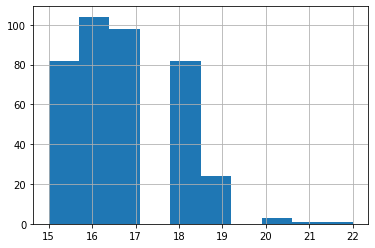

In [2]:
stud.age.hist()
stud.age.describe()
stud = stud.loc[stud['age'] < 21] #считаем выбросами значения, которым соответствует по 1 строке

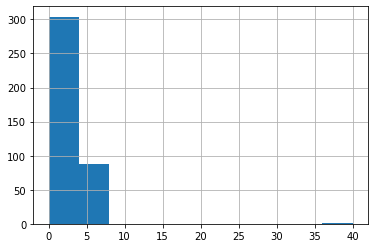

In [3]:
stud.Fedu.hist()
stud.Fedu.describe()
stud = stud.loc[stud['Fedu'] != 40] #присутствует выброс

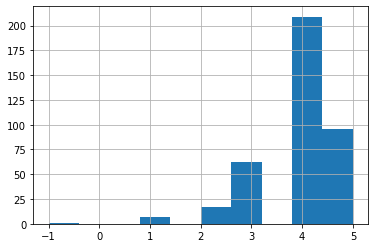

In [4]:
stud.famrel.hist()
stud.famrel.describe()
stud = stud.loc[stud['famrel'] != -1] #присутствует выброс

In [5]:
display(pd.DataFrame(stud.romantic.value_counts()))

print("Значений, встретившихся в столбце более 10 раз:",(stud.romantic.value_counts()>10).sum())
stud.loc[:, ['romantic']].info()
#были проверены все столбцы типа object, нетипичных значений нет

,romantic
no,268
yes,123


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  391 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


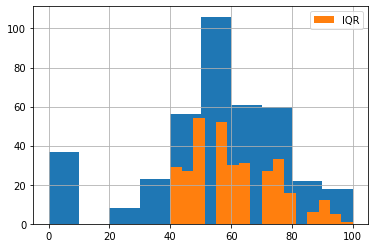

In [6]:
stud.score.hist()
stud.score.describe()

IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.score.loc[stud.score.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
plt.legend();


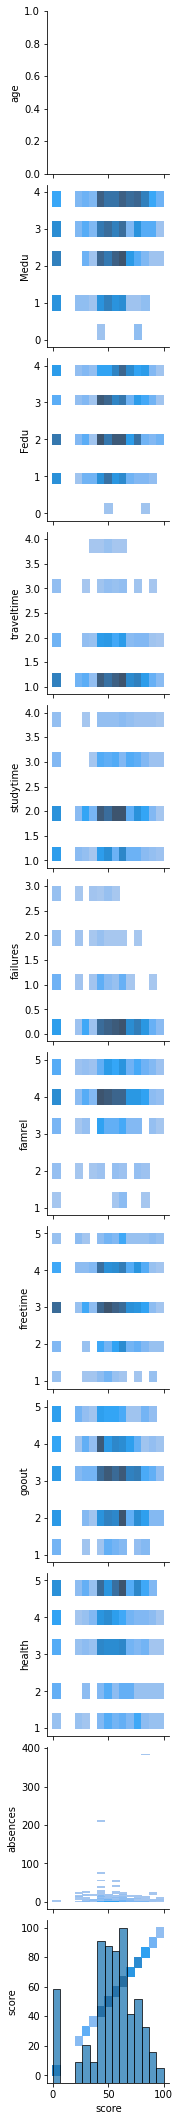

In [7]:
sns.pairplot(stud, x_vars = ['score'], kind = 'hist')

In [8]:
stud.corr()
#нет сильной корреляции между переменными, кроме Medu и Fedu

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160324,-0.129971,0.108503,0.011202,0.172926,0.044189,-0.003500,0.117416,-0.040097,0.092714,-0.144471
Medu,-0.160324,1.000000,0.597277,-0.162009,0.073398,-0.240126,-0.013763,0.029145,0.059139,-0.049678,-0.011710,0.203666
Fedu,-0.129971,0.597277,1.000000,-0.136281,-0.006826,-0.242287,-0.024475,-0.017869,0.047971,-0.001883,0.023092,0.117262
traveltime,0.108503,-0.162009,-0.136281,1.000000,-0.108922,0.070633,-0.028512,-0.003048,0.059552,-0.049343,-0.037263,-0.060670
studytime,0.011202,0.073398,-0.006826,-0.108922,1.000000,-0.141646,0.031955,-0.112960,-0.046855,-0.079533,-0.023835,0.108543
failures,0.172926,-0.240126,-0.242287,0.070633,-0.141646,1.000000,-0.019915,0.080551,0.108528,0.095889,0.053777,-0.325123
famrel,0.044189,-0.013763,-0.024475,-0.028512,0.031955,-0.019915,1.000000,0.154970,0.065470,0.103648,-0.079255,0.052983
freetime,-0.003500,0.029145,-0.017869,-0.003048,-0.112960,0.080551,0.154970,1.000000,0.287325,0.071593,0.007578,0.022373
goout,0.117416,0.059139,0.047971,0.059552,-0.046855,0.108528,0.065470,0.287325,1.000000,-0.002797,-0.051393,-0.125041
health,-0.040097,-0.049678,-0.001883,-0.049343,-0.079533,0.095889,0.103648,0.071593,-0.002797,1.000000,-0.016535,-0.075527


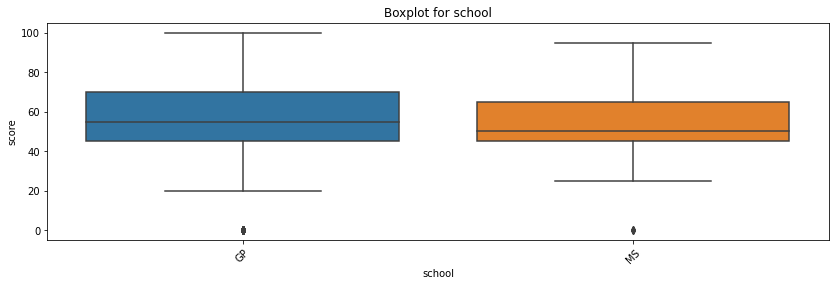

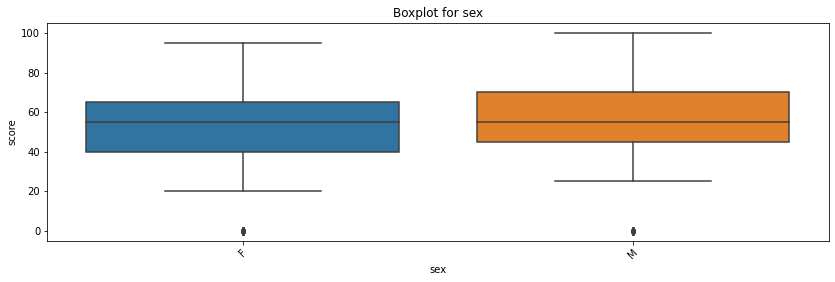

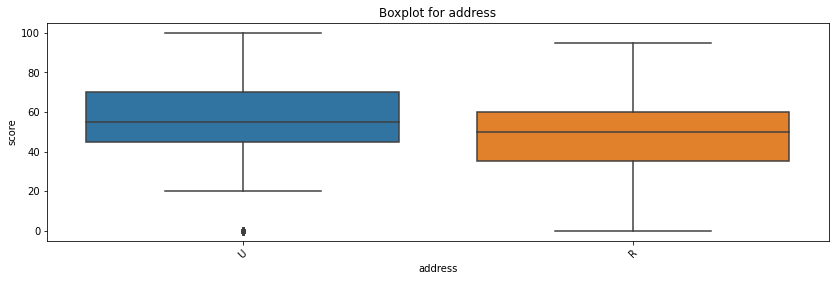

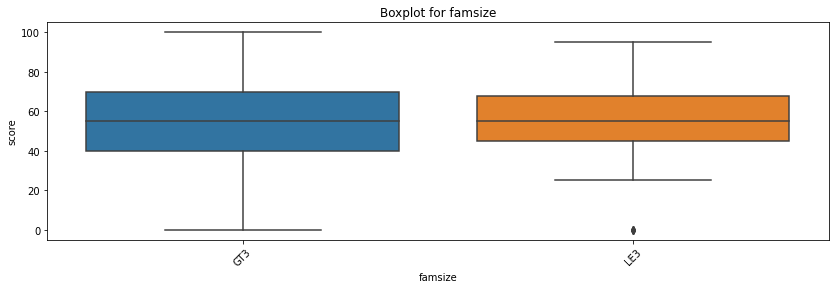

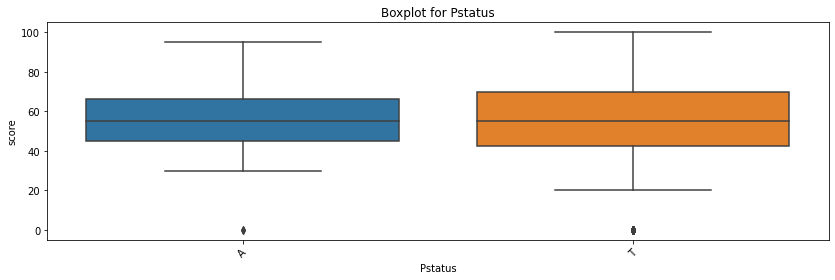

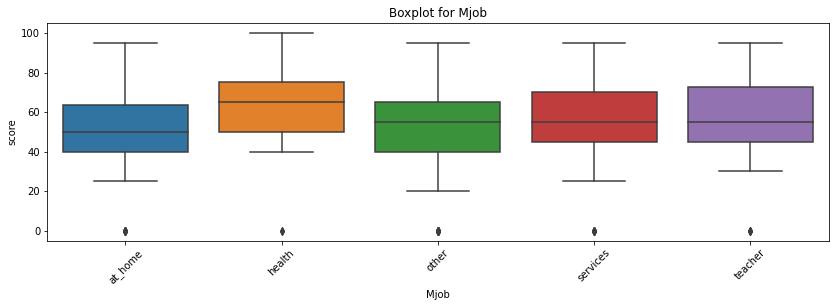

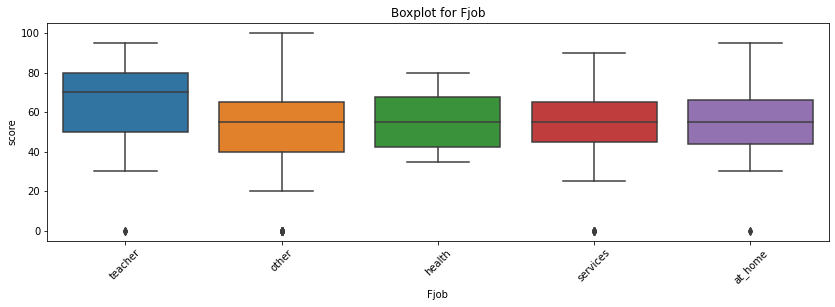

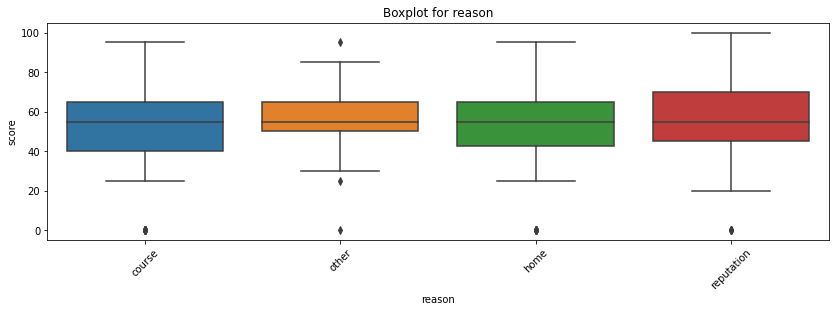

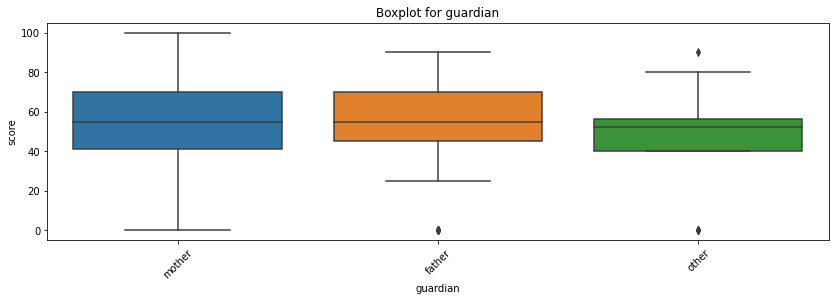

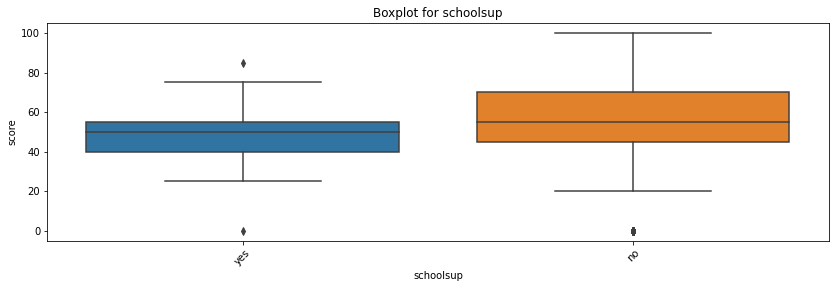

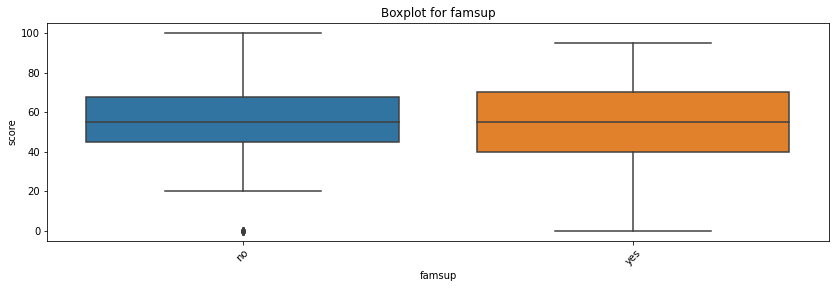

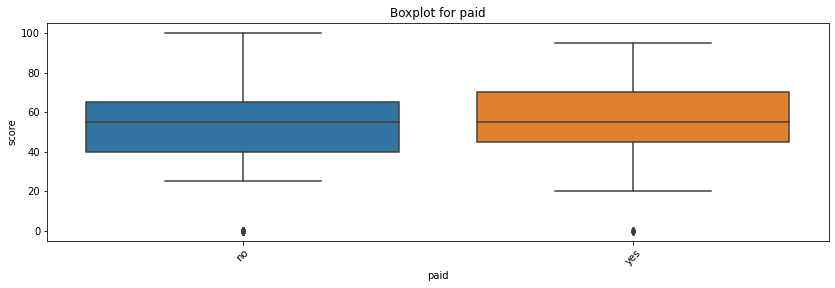

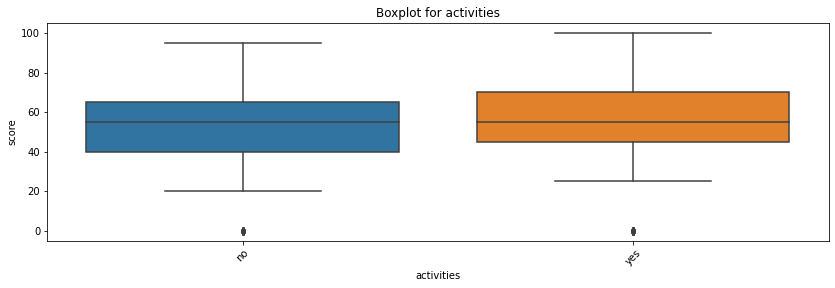

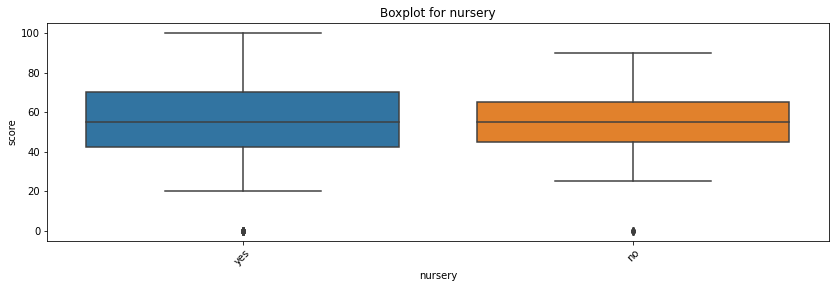

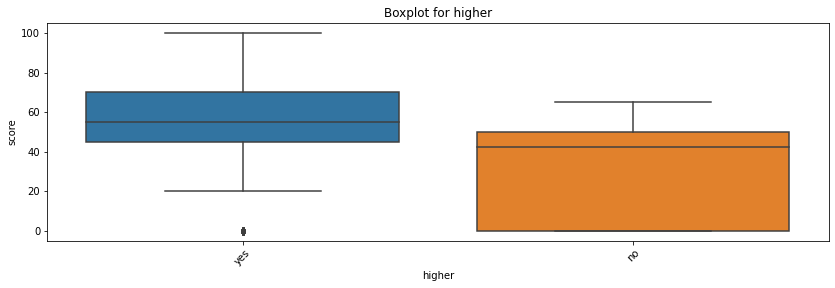

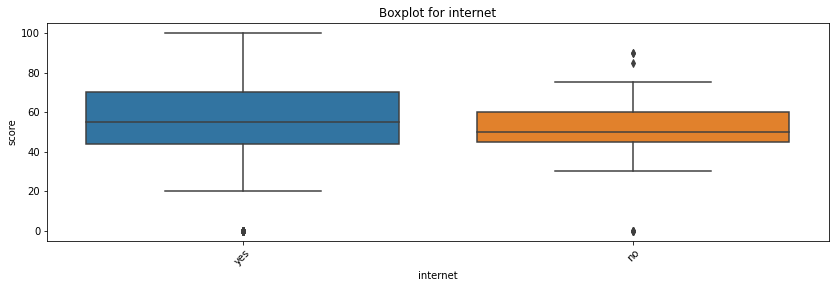

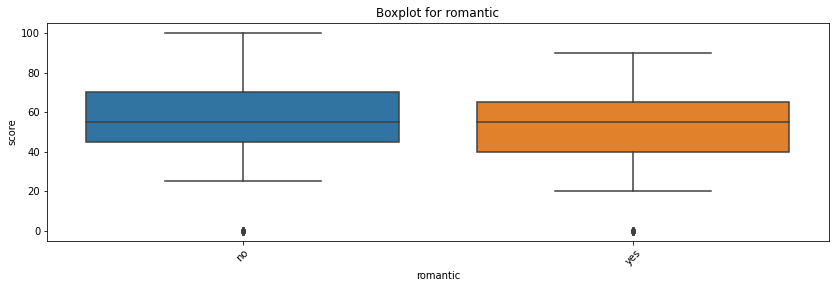

In [9]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = column, y = 'score', data = stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in stud.columns: 
    if stud[col].dtype == object:
        get_boxplot(col)


#оценки выше у тех студентов, матери которых работают в сфере здравоохранения
#оценки выше у тех студентов, отцы которых работают учителями
#студенты, не заинтересованные в получении высшего образования, не получают хорошие оценки


In [10]:
#тест Стьюдента
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in stud.columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки absences
Найдены статистически значимые различия для колонки score
